# Machine Learning: Supervised Learning
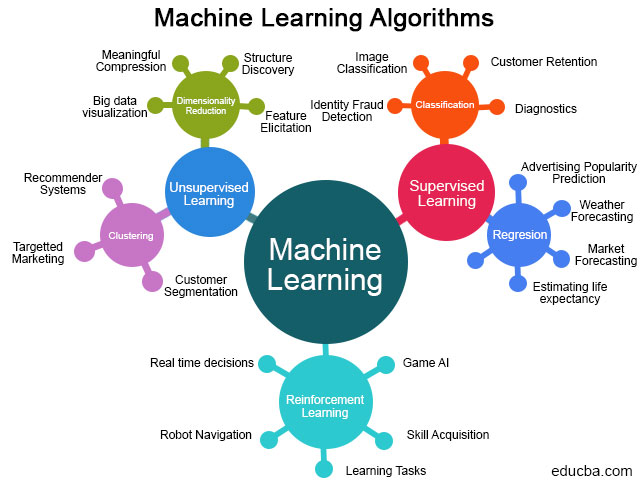!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regresión-lineal-simple" data-toc-modified-id="Regresión-lineal-simple-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regresión lineal simple</a></span><ul class="toc-item"><li><span><a href="#Scikit-learn" data-toc-modified-id="Scikit-learn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scikit-learn</a></span></li></ul></li><li><span><a href="#Regresión-lineal-múltiple" data-toc-modified-id="Regresión-lineal-múltiple-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regresión lineal múltiple</a></span></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-1" data-toc-modified-id="Ejercicio-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ejercicio 1</a></span></li></ul></li></ul></div>

# Regresión Lineal

**¿Qué es regresión?**


Es un proceso que permite la estimación de las relaciones funcionales entre variables. En el campo de aprendizaje automático es ampliamente utilizado para la predicción del valor de una variable dependiente, a partir de una o más variables explicativas. El modelo de regresión puede ser lineal o no lineal.


**¿Qué preguntas se pueden responder mediante regresiones?**

- ¿Cómo varían el volumen de ventas cuando subimos los precios?
- ¿Afecta el nombre de un producto a su contratación?
- ¿Cuántos clientes contratarán hoy un plan de pensiones?


**¿Cuándo usar regresión lineal?**

- Cuando queremos predecir el valor de una variable a partir de otras.
- Si queremos explicar o entender la relación entre dos o más atributos.

---

## Regresión lineal simple

Los problemas de regresión tienen una estructura común: una variable respuesta ($y$) que puede ser expresada como combinación de una o más variables independientes ($x_i$), llamadas covariables o predictores. El algoritmo de regresión intenta construir un modelo que exprese la variable respuesta en función de las covariables, como:

$$y = a_1x_1 + a_2x_2 + \ldots + a_nx_n$$

donde $a_i$ son los parámetros del modelo, llamados coeficientes. El modelo se ajusta mediante Mínimos Cuadrados Ordinarios (OLS en inglés), donde los coeficientes son elegidos para minimizar el cuadrado de la distancia (vertical) entre los valores predichos y los reales.

*Ejemplo*. Para entender las funcionalidades de Python para regresión vamos a construir un modelo sencillo de regresión a partir de datos sintéticos usando varias librerías científicas de Python.  

Para ello vamos a generar 300 valores aleatorios de una distribución Gaussiana, los multiplicamos por unos coeficientes que les den una forma aproximadamente lineal.

In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
data = np.random.randn(300, 2)
coefs = np.array([[0.6, 0.4], [0.4, 0.6]])
data = np.dot(data, coefs)

X = data[:, 1]
y = data[:, 0]

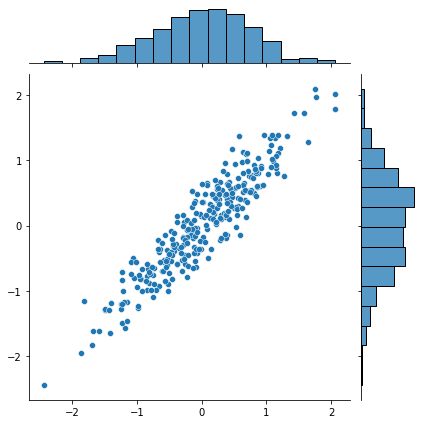

In [72]:
np.corrcoef(X, y)

sns.jointplot(x=X, y=y)
#sns.jointplot(X, y)
plt.show()

### Scikit-learn

Scikit-learn posee una interfaz orientada a objetos basada en el concepto de un *Estimador*

El método <code>Estimator.fit</code> establece el estado del estimador de acuerdo a los datos de entrenamiento. Usualmente estos datos están representdos por un `numpy.array` bidimensional $x$ con dimensiones <code>(n_muestras, n_predictores)</code> que contiene la matriz de características, y un `numpy.array` unidimensional que contiene los valores de la variable de respuesta $y$.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [73]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [74]:
regr = LinearRegression(fit_intercept=True)

In [75]:
X.shape

(300,)

In [76]:
X = X.reshape(-1, 1)
X.shape

(300, 1)

In [77]:
regr.fit(X, y)

LinearRegression()

In [78]:
regr.intercept_

0.02016364652616379

In [79]:
regr.coef_

array([0.95284228])

In [80]:
y_pred = regr.predict(X)
y_pred[:10]

array([ 0.00985957,  0.68866131, -0.87253913, -0.05075984,  0.67253095,
       -0.23553905, -1.40825266, -0.78904056,  0.85554504, -0.19951966])

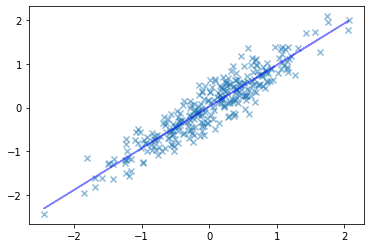

In [85]:
plt.scatter(X, y, marker="x", alpha=0.5)
plt.plot(X, y_pred, alpha=0.5, c="blue")
plt.show()

In [86]:
print(mean_absolute_error(y, y_pred))

0.21858976717974707


In [88]:
print(r2_score(y, y_pred))

0.8663414290256772


El método ``Estimator.predict`` permite hacer predicciones. En el caso de regresión, este método devuelve los valores predichos por el modelo.

Existe también un objeto `Estimator` especial llamado `Transformer` que permite realizar transformaciones sobre los datos. En el caso de regresión, una transformación adecuada es la de normalizar los predictores, tal que tengan media cero y desviación típica 1 con ``sklearn.preprocessing.StandardScaler``

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
print(X.mean(), X.std())

0.0121832854213425 0.7353116005132239


In [91]:
X_shifted = X + 4

In [92]:
print(X_shifted.mean(), X_shifted.std())

4.012183285421343 0.7353116005132239


In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_shifted)

StandardScaler()

In [95]:
StandardScaler().fit(X_shifted)

StandardScaler()

In [96]:
scaler.mean_, scaler.scale_

(array([4.01218329]), array([0.7353116]))

In [97]:
X_stand = scaler.transform(X_shifted)

In [98]:
X_stand.mean(), X_stand.std()

(-4.529709940470639e-16, 1.0000000000000002)

In [99]:
print(X_shifted.mean(), X_shifted.std())

4.012183285421343 0.7353116005132239


In [100]:
scaler_new = StandardScaler()

In [101]:
X_stand_new = scaler_new.fit_transform(X_shifted)

In [102]:
X_stand_new.mean(), X_stand_new.std()

(-4.529709940470639e-16, 1.0000000000000002)

In [103]:
StandardScaler().fit_transform(X_shifted)

array([[-3.12756200e-02],
       [ 9.37560913e-01],
       [-1.29070095e+00],
       [-1.17796170e-01],
       [ 9.14538469e-01],
       [-3.81526855e-01],
       [-2.05531131e+00],
       [-1.17152556e+00],
       [ 1.17574985e+00],
       [-3.30117294e-01],
       [-2.68666482e-01],
       [ 9.82667399e-01],
       [-1.06606732e-01],
       [-2.04284864e+00],
       [-3.56722099e-01],
       [ 1.93194236e+00],
       [ 7.26768645e-01],
       [ 2.45913024e-01],
       [ 1.96403293e-01],
       [ 9.49010563e-01],
       [ 1.16028371e+00],
       [ 8.47943864e-01],
       [ 1.38869202e+00],
       [ 6.09252615e-01],
       [-7.79128724e-01],
       [ 3.71031303e-01],
       [ 8.29891596e-01],
       [-1.96257967e+00],
       [ 3.72456110e-01],
       [-2.54466045e+00],
       [-4.92156659e-01],
       [ 1.05752296e+00],
       [-1.15950410e+00],
       [ 6.83611770e-01],
       [ 3.75638032e-01],
       [ 2.50112108e-01],
       [-6.03730446e-01],
       [ 1.30268411e+00],
       [-1.5

---

## Regresión lineal múltiple

Para ajustar modelo de regresión múltiple podemos usar la misma librería, solo que ahora al crear el objeto OLS, x no será un vector columna, sino que contendrá varias columnas.

En este ejemplo usaremos el dataset de diabetes que consiste en 10 variables fisológicas (edad, sexo, peso, presión arterial, y seis pruebas sanguíneas) de 442 pacientes, y la indicación del progreso de la enfermedad después de un año.

In [104]:
from sklearn import datasets

In [105]:
data = datasets.load_diabetes()

Let's explore the dataset

In [106]:
df_diabetes = pd.DataFrame(data.data, columns=data.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


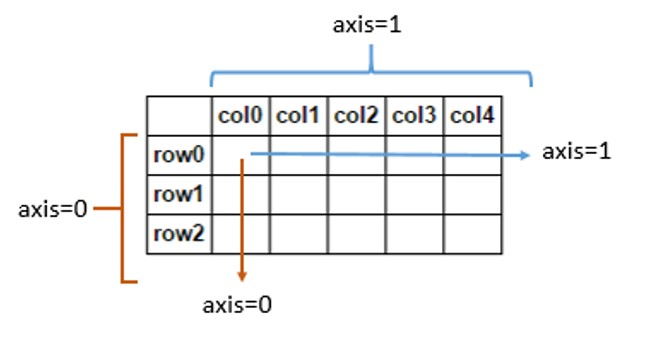!

In [107]:
df_diabetes = pd.concat([df_diabetes, pd.DataFrame(data.target, columns=["target"])], axis=0)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,NaN
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,NaN
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,NaN
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,NaN
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,NaN


In [108]:
print(df_diabetes.apply(lambda x: sum(x**2)))

age      NaN
sex      NaN
bmi      NaN
bp       NaN
s1       NaN
s2       NaN
s3       NaN
s4       NaN
s5       NaN
s6       NaN
target   NaN
dtype: float64


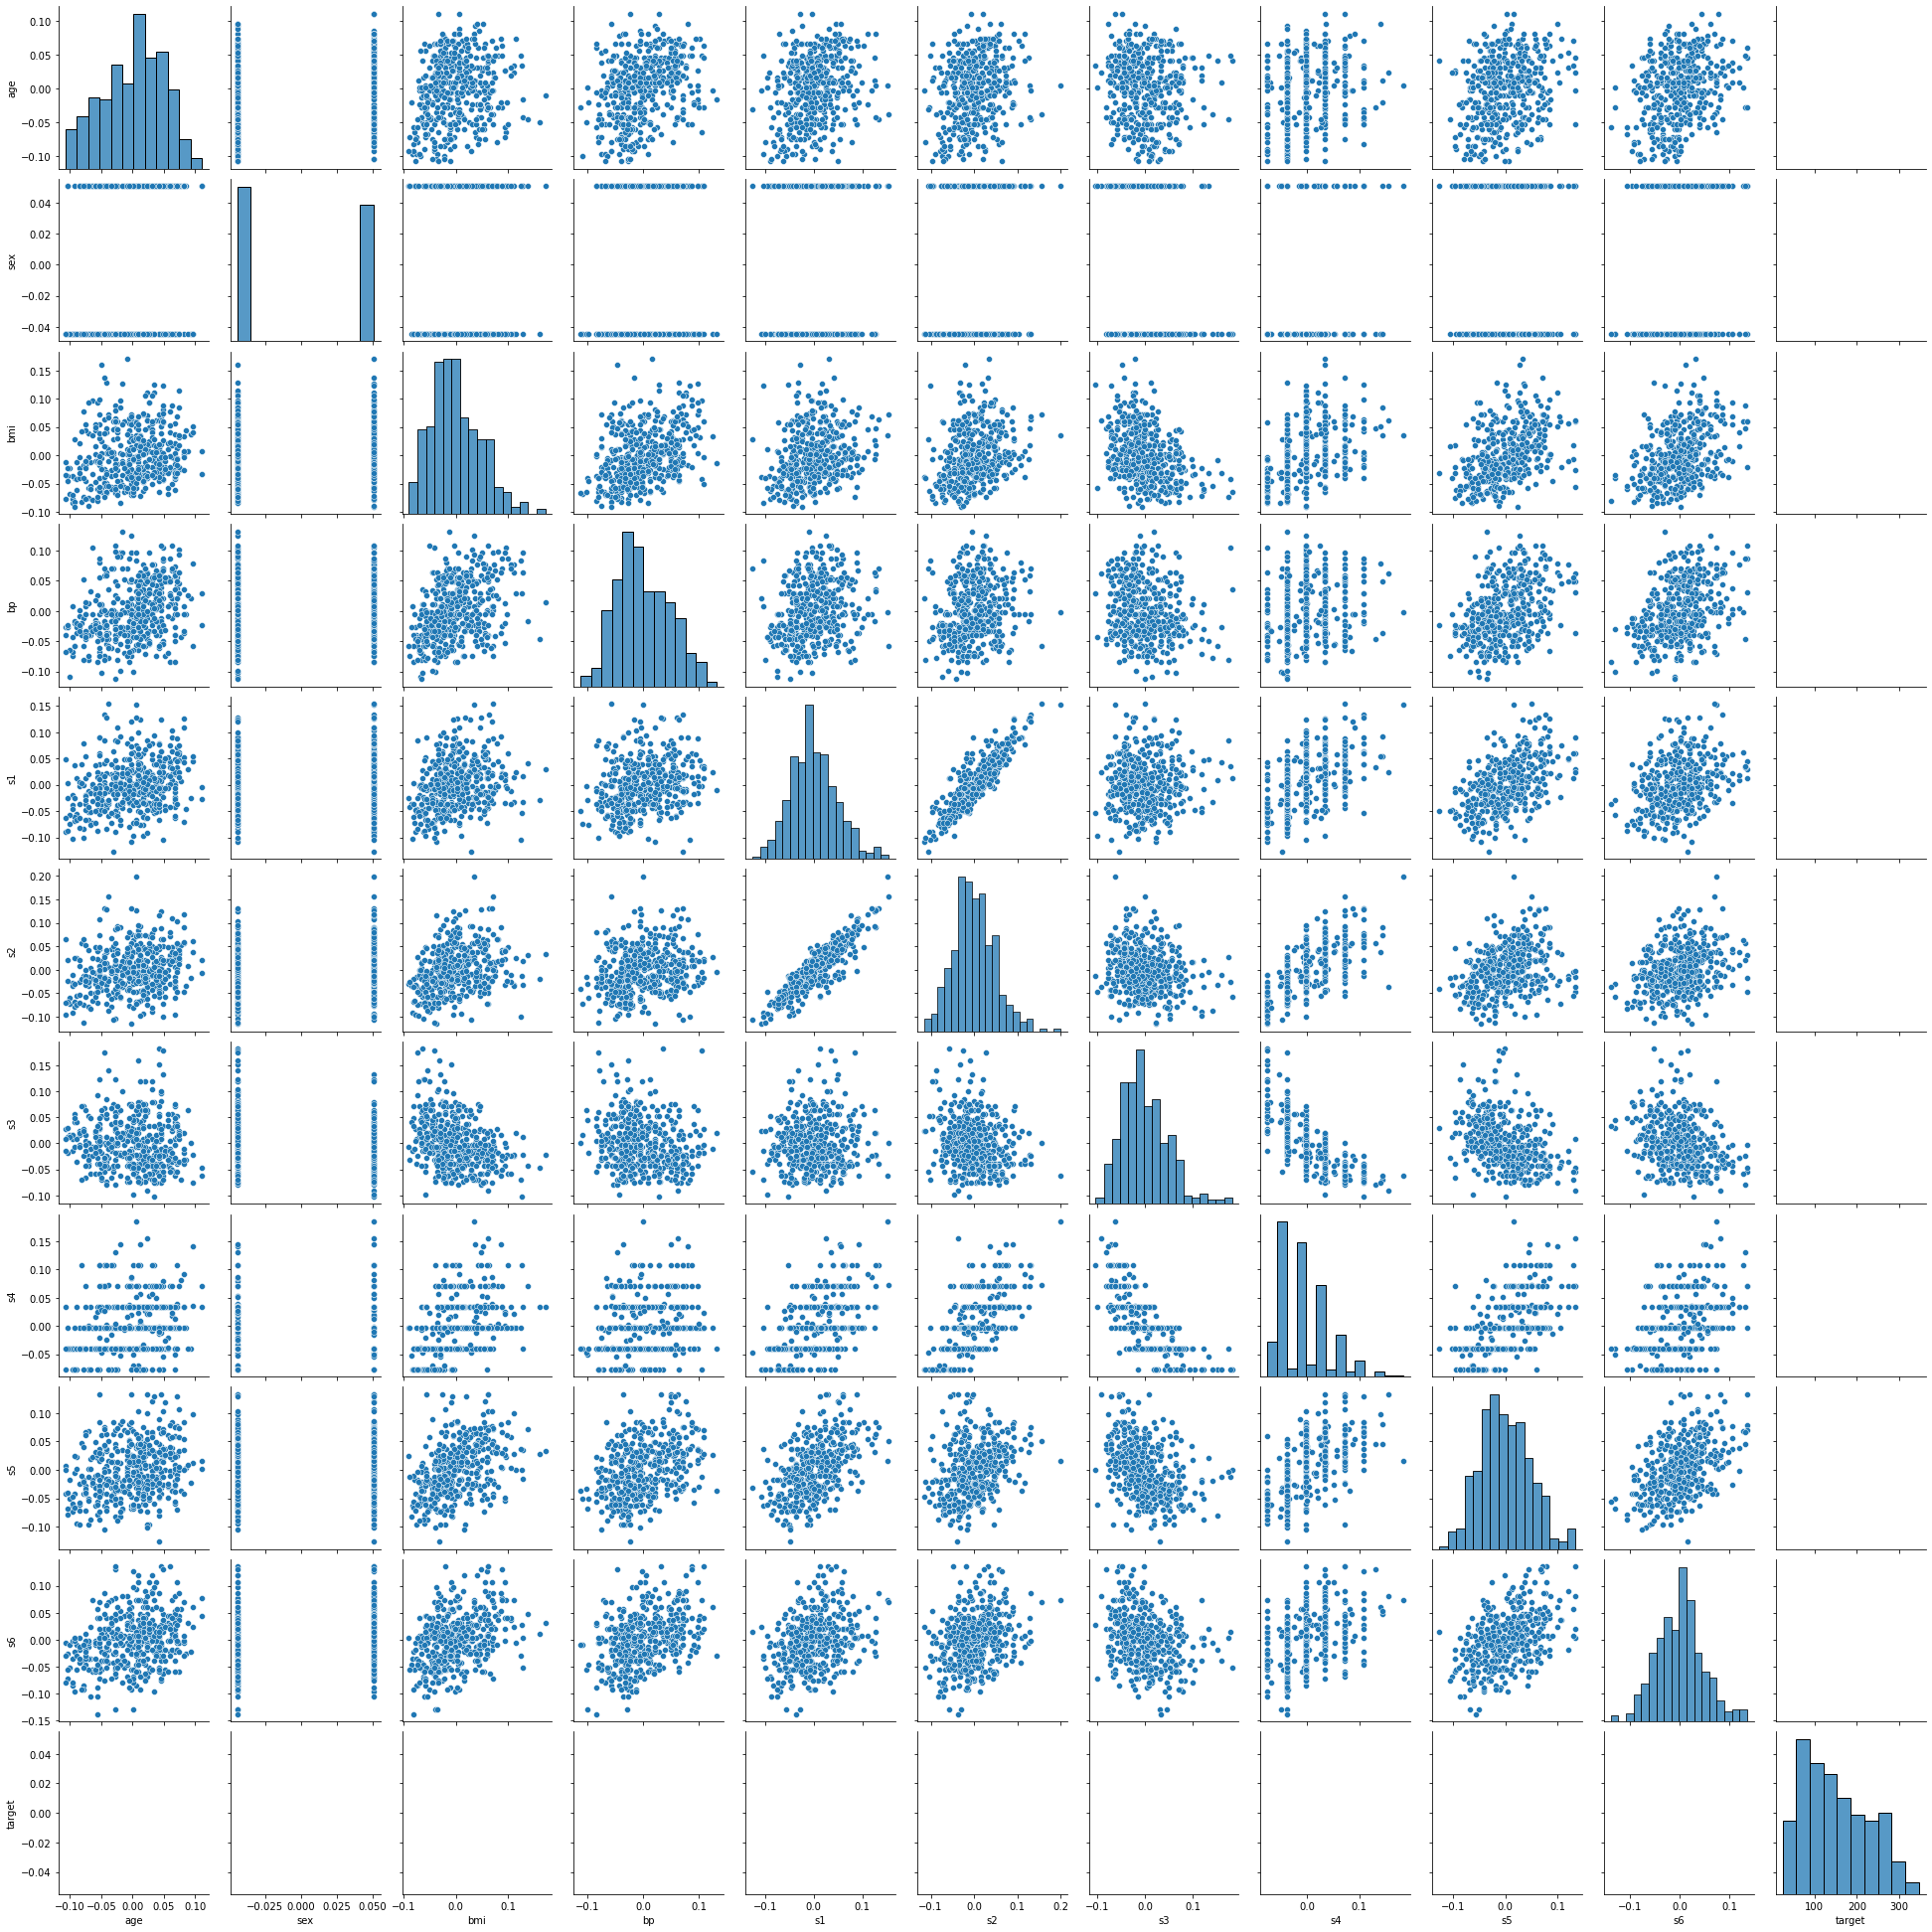

In [109]:
sns.pairplot(df_diabetes)
plt.show()

In [110]:
X = data.data
y = data.target

In [111]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)
y_pred = regr.predict(X)

print("Coefs:", regr.intercept_, regr.coef_)
print("MAE:", mean_absolute_error(y, y_pred))
print("R2:", r2_score(y, y_pred))

Coefs: 152.1334841628965 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MAE: 43.277395083749866
R2: 0.5177494254132934


In [112]:
res = pd.DataFrame({"y": y, "y_pred": y_pred, "err": y - y_pred, "|err|": np.abs(y - y_pred)})
res = res[["y", "y_pred", "err", "|err|"]]
res.head()

,y,y_pred,err,|err|
0,151.0,206.117070,-55.117070,55.117070
1,75.0,68.072348,6.927652,6.927652
2,141.0,176.884060,-35.884060,35.884060
3,206.0,166.917966,39.082034,39.082034
4,135.0,128.459842,6.540158,6.540158


Vamos a representar gráficamente los resultados

/home/bigdatafutura/anaconda3/envs/env-ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


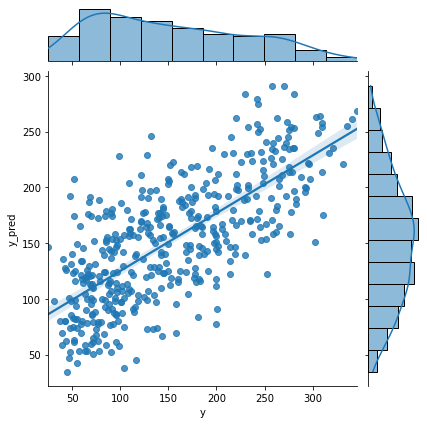

In [113]:
sns.jointplot(res["y"], res["y_pred"], kind="reg")
plt.show()

Ahora vamos a generar un gráfico con los residuales

/home/bigdatafutura/anaconda3/envs/env-ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


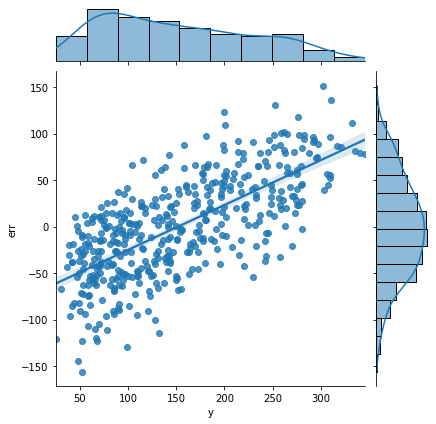

In [114]:
sns.jointplot(res["y"], res["err"], kind="reg")
plt.show()

El módulo `sklearn` no devuelve los estadísticos de contraste para los parámetros del módelo de regresión. Si queremos obtener este tipo de información debemos utilizar otra librería, por ejemplo `scipy`:

In [115]:
from scipy import stats

In [116]:
slope, intercept, r2, pvalue, stderr = stats.linregress(X[:,0], y)
print(slope, intercept, r2, pvalue, stderr)

304.1830745282948 152.13348416289605 0.18788875071891983 7.055686149116337e-05 75.80599912702861


Para regresión múltiple debemos utilizar `statsmodel`:

In [117]:
import statsmodels.api as sm

In [118]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

In [119]:
X_const = sm.add_constant(X)

In [120]:
print(X[:2, :], X_const[:2, :])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]] [[ 1.          0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235
  -0.03482076 -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [ 1.         -0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872
  -0.01916334  0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [121]:
model = sm.OLS(y, X_const)
results = model.fit()

In [60]:
print ('Coeficientes: ',  results.params)
print ('P-values: ', results.pvalues)
print ('F-test: ', results.fvalue)
print ('F-test p-value: ', results.f_pvalue)
print ('MAE: ', np.mean(abs(y - results.fittedvalues)))
print ('R2: ', results.rsquared)

Coeficientes:  [ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]
P-values:  [1.00967888e-208 8.66999818e-001 1.04142931e-004 4.29955755e-014
 1.02381891e-006 5.79473491e-002 1.60389213e-001 6.34720696e-001
 2.73455652e-001 1.55602146e-005 3.05998348e-001]
F-test:  46.27262550062717
F-test p-value:  3.8269624734011723e-62
MAE:  43.277395083749866
R2:  0.5177494254132934


In [61]:
r2_score(y, y_pred), regr.intercept_, regr.coef_

(0.5177494254132934,
 152.1334841628965,
 array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
        -792.18416163,  476.74583782,  101.04457032,  177.06417623,
         751.27932109,   67.62538639]))